# SUMMARIZATION TECHNIQUES

## USE OF DATASETS WITH GROUND TRUTH FOR COMPARING THE DIFFERENT SUMMARIZATION TECHNIQUES

### FIRST DATASET - QMSUM WITH DISCUSSION ABOUT PRODUCTS

In [35]:
import json
import pandas as pd

# Load the JSON data
with open('datasets/QMSum/data/Product/train/ES2002c.json', 'r') as f:
    data = json.load(f)


print(data.keys())
df_topics = pd.DataFrame(data['topic_list'])
df_query_list = pd.DataFrame(data['general_query_list'])
df_comments = pd.DataFrame(data['meeting_transcripts'])
print('--------------------------------------------------------------------------------------------------------------------')
print(df_comments)
print('--------------------------------------------------------------------------------------------------------------------')
print(df_topics)

dict_keys(['topic_list', 'general_query_list', 'specific_query_list', 'meeting_transcripts'])
--------------------------------------------------------------------------------------------------------------------
                 speaker                                            content
0    Industrial Designer  'S to do now is to decide how to fulfil what y...
1              Marketing                                             Yeah .
2    Industrial Designer                      so in that sense {disfmarker}
3        Project Manager                                             Okay .
4              Marketing                                      Yeah , sure .
..                   ...                                                ...
635  Industrial Designer                                    Play-doh time .
636      Project Manager                      Yeah quite jealous actually .
637  Industrial Designer  You got to choose first . {vocalsound} No , we...
638            Marketing     

                speaker                                            content
0   Industrial Designer  'S to do now is to decide how to fulfil what y...
1             Marketing                                             Yeah .
2   Industrial Designer                      so in that sense {disfmarker}
3       Project Manager                                             Okay .
4             Marketing                                      Yeah , sure .
..                  ...                                                ...
87            Marketing  Anyway those are {disfmarker} that's all I have ,
88      Project Manager                                     That's great .
89            Marketing  but uh hopefully we can we can revisit those i...
90      Project Manager                              Uh-huh . Okay great .
91            Marketing                                              {gap}

[92 rows x 2 columns]


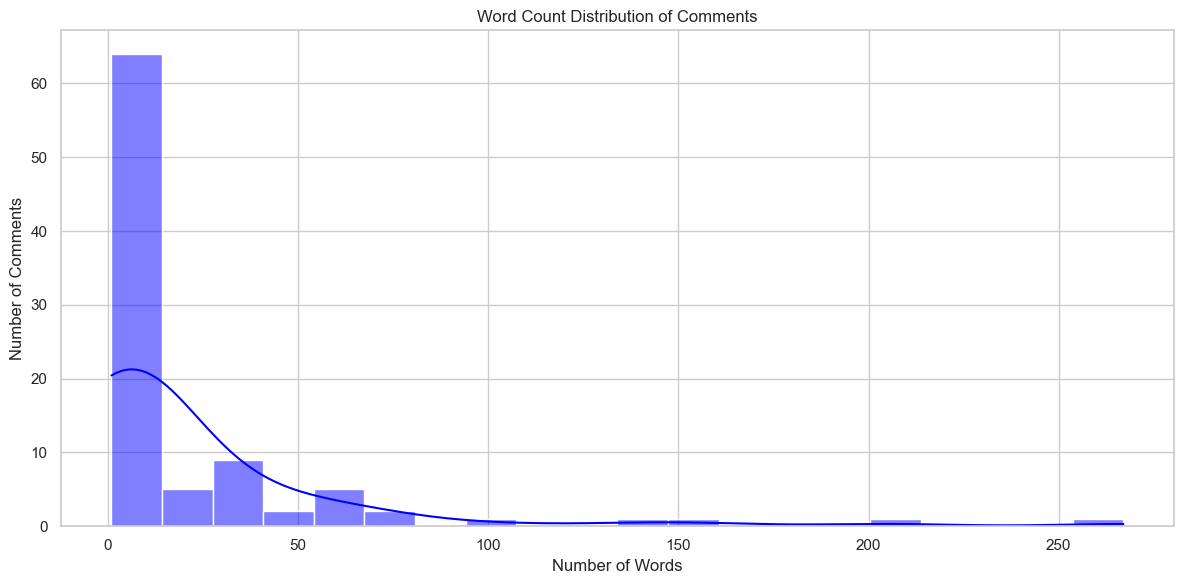

In [36]:
from utils.plot_words_distribution import plot_distribution_of_words

text_col = 'content'

# take the topic No2:  Presentation on the component design
df_sum_3 = df_comments[0:92]
df_sum_3 = df_sum_3.reset_index(drop=True)
print(df_sum_3)

# plot the distribution of words
plot_distribution_of_words(df_sum_3, text_col)

In [37]:
from utils.load_prompts import load_chosen_prompt
from summarization_methods.divide_comments_and_summarize import divide_comments_by_time, create_summary_for_groups_of_comments
from utils.load_pretrained_spacy_model import load_pretrained_model
from sklearn.model_selection import train_test_split

# load the final dataset and the language
df_sum_3, _ = load_pretrained_model(df=df_sum_3, text_col=text_col)

# load the prompt template
prompt_template = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The language of the dataset is: en
The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


### 1ST SUMMARIZATION TECHNIQUE: SEPARATE COMMENTS RANDOMLY INTO GROUPS

We are going to implement a simple technique by grouping the comments/reviews into groups randomly, create a summary for each group of comments and finally a final summarization based on the summaries of group of comments

In [38]:
from summarization_methods.divide_comments_and_summarize import divide_comments_by_time, create_summary_for_groups_of_comments

language = 'English'
topic = df_topics.iloc[0].topic

# divide the comments into groups
groups_1 = divide_comments_by_time(df_sum_3, text_column='content')

#create the summaries
summaries_1 = create_summary_for_groups_of_comments(groups=groups_1, prompt=prompt_template, gpt_model='gpt-4o', language=language, topic=topic)

Comments do not contain timestamp. Continue the group by shuffle them.


  7%|████████▏                                                                                                                 | 1/15 [00:02<00:30,  2.16s/it]

The comments primarily discuss features and decisions related to a previous meeting on market trends. Key points include the decision to use non-rechargeable battery-powered devices and the organization of audio-visual functions into specific categories. Additionally, new requirements were highlighted: ignoring teletext, focusing solely on TV functions, and incorporating the company's corporate color and slogan. These insights reflect ongoing considerations in product development and brand alignment.


 13%|████████████████▎                                                                                                         | 2/15 [00:03<00:23,  1.79s/it]

The comments suggest minimal discussion with most participants expressing readiness to proceed or having little to add. One comment hints at recapping the last meeting's minutes, indicating the prior decisions may help facilitate the current discussion on market trends. There is an apparent lack of new insights or thematic variance reflecting the group’s focus remains aligned with previous considerations.


 20%|████████████████████████▍                                                                                                 | 3/15 [00:05<00:21,  1.77s/it]

The comments focus on initiating a comprehensive discussion before delving into detailed topics. There is an emphasis on presenting and acknowledging crucial background information to ensure the success of the meeting. The primary objective is to decide on product concepts, though the meeting structure seems somewhat informal, indicated by vocal cues and requests for input on any overlooked details. Overall, the discussion appears to emphasize preparation and collective decision-making.


 27%|████████████████████████████████▌                                                                                         | 4/15 [00:07<00:20,  1.83s/it]

The comments highlight a discussion that mostly revolves around understanding and integrating market trends while maintaining caution towards overly rapid product designs that may not align with existing concepts. Participants emphasize the importance of considering multi-disciplinary influences, particularly those outside the electronics domain, suggesting a need for thoughtful integration into home decor and computing fields. The conversation underscores a preference for detailed, preparatory discussions, aligning with previous sessions that prioritize thorough background understanding and cautious product development.


 33%|████████████████████████████████████████▋                                                                                 | 5/15 [00:09<00:20,  2.04s/it]

The comments reveal a diverse range of insights, primarily focusing on the juxtaposition of action-oriented discussions with the conceptual background. There is a noticeable mention of integrating high-tech features with minimalist design, highlighting a trend toward user-friendly, buttonless technology. Additionally, a new dimension of market research emphasizes the significance of fashion styles, particularly an emerging theme around fruit and vegetable motifs in European fashion trends. Overall, the discussion appears to be evolving, emphasizing action in design, innovative technological execution, and aligning product themes with contemporary style trends.


 40%|████████████████████████████████████████████████▊                                                                         | 6/15 [00:11<00:17,  1.95s/it]

The comments reflect minimal engagement and lack substantive new insights, with participants showing readiness to proceed and little to add. There is a casual tone marked by vocal sounds and informal cues, suggesting an informal yet directed meeting approach. The focus appears to be on moving forward efficiently, with an implicit understanding of the impact of discussed ideas on future actions.


 47%|████████████████████████████████████████████████████████▉                                                                 | 7/15 [00:13<00:15,  1.99s/it]

The comments primarily focus on enhancing ease of use through innovative design, with an emphasis on incorporating features that offer additional value, such as lighting elements in devices that respond to user interaction. There is also mention of exploring the integration of speech recognition technology, although a final decision on its inclusion remains undecided. Overall, the dialogue suggests interest in balancing innovation with practical functionality, reflecting ongoing discussions toward creating user-friendly, technologically advanced products with a subtle flair. The approach is somewhat informal, with participants exchanging ideas rather than reaching concrete conclusions.


 53%|█████████████████████████████████████████████████████████████████                                                         | 8/15 [00:15<00:12,  1.83s/it]

The comments suggest a consideration of trends in clothing and furniture, with a deliberation on whether to integrate or distance from these trends. There is a mention of organizing discussions post-presentations to enhance focus and coherence, indicating a shift towards structured discourse. Minimal engagement is noted, with sparse verbal contributions and informal cue usage, highlighting an informal yet possibly efficient meeting structure.


 60%|█████████████████████████████████████████████████████████████████████████▏                                                | 9/15 [00:16<00:10,  1.69s/it]

The comments indicate minimal engagement and do not introduce substantial new insights. The discussion has a casual tone, characterized by affirmations and agreement without detailed exploration. Participants seem ready to move forward, implying an understanding of previous discussions and a focus on decision-making processes for implementation. The informal nature of the conversation suggests a meeting with an emphasis on action and progression rather than in-depth analysis.


 67%|████████████████████████████████████████████████████████████████████████████████▋                                        | 10/15 [00:17<00:08,  1.62s/it]

The comments reflect minimal engagement, with concise affirmations and limited elaboration. Suggestions include expanding on prior ideas by incorporating customizable features, such as color-changing capabilities or different covers for controls. There is an indication of interest in revisiting these concepts in future discussions, although no substantial new insights or decisions are reached. The tone remains informal, with a focus on continuity rather than immediate action.


 73%|████████████████████████████████████████████████████████████████████████████████████████▋                                | 11/15 [00:20<00:07,  1.80s/it]

The comments reflect a moderate level of engagement with a focus on innovation, user-friendliness, and maintaining technological integration in the project. There is an emphasis on being creative without adding unnecessary functional elements, with innovation contributing more to the aesthetic aspect rather than purely functionality. The discussion involves synthesizing market research to align with project plans and identifying significant trends to refine design options. The tone remains informal, with participants focusing on understanding and strategizing how to integrate insights into the overall vision, although no substantial new decisions have been made.


 80%|████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 12/15 [00:22<00:05,  1.83s/it]

The comments reflect minimal engagement, characterized by brief affirmations and pauses without substantial content or new insights. There is a lack of detailed discussion or focus on specific topics, indicating that participants are not actively contributing to the advancement of the discussion. The informal tone suggests a conversational atmosphere rather than a structured meeting, with a potential readiness to move forward without exploring topics in depth.


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 13/15 [00:23<00:03,  1.70s/it]

The comments reflect minimal engagement and consist largely of brief affirmations with little elaboration. The interaction suggests a casual, informal tone, with participants indicating agreement or understanding without delving into specific topics or new insights. There is a clear lack of content or in-depth discussion, which aligns with the pattern of moving forward without extensive analysis or decision-making.


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 14/15 [00:26<00:02,  2.08s/it]

The comments suggest a moderate level of engagement, focusing on aesthetics and consumer preferences rather than functionality. Participants express interest in a stylish design for television remote controls, emphasizing a fancy look over a purely practical one. An analogy is made to the Mac iPod but with a shift towards more comfortable and vibrant designs. The discussion touches on integrating a cohesive marketing identity, with mentions of themes like color choices (e.g., lemon, lime, green) to enhance consumer association and appeal. There is a consensus on targeting a demographic of 15 to 35 years old, with an informal tone aiming to inspire creative thinking in design and marketing strategies without delving deeply into specific actionable decisions.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:28<00:00,  1.93s/it]

The comments reflect a moderate level of engagement, focusing on emerging market trends in materials and design. Participants highlight the shift towards soft, spongy, ergonomic materials as a recent development, contrasting this with last year's market trends. The discussion emphasizes the importance of innovative and cutting-edge design technology, stressing ease of use as a crucial element. There is an expressed interest in vibrant, natural colors, with a particular fondness for themes like lemon or lime, which are commonly seen in various industries. The integration of style, function, and appealing aesthetics are deemed essential for capturing the target market. The conversation maintains an informal tone, aiming to align these insights with the broader market strategy, without delving into specific actionable outcomes.


In [39]:
# load the prompt template
prompt_template_final_1 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

The number of arguments to contain in the prompt are: 2
The required arguments are: ['topic', 'summaries']


#### FINAL SUMMARY BASED ON SUMMARIES OF COMMENTS

In [40]:
from summarization_methods.divide_comments_and_summarize import final_summary_of_divided_comments
topic = df_topics.iloc[0].topic

#create the summaries
final_summary_1 = final_summary_of_divided_comments(prompt=prompt_template_final_1, gpt_model='gpt-4o', topic=topic, summaries=summaries_1)

The summary of the discussion on market trends reveals several key themes. There is a focus on product design and functionality, with an emphasis on aligning with market trends and consumer preferences. Participants are attentive to the aesthetic aspects of technology, exploring high-tech features with minimalist design and vibrant colors inspired by current fashion trends. Innovation and user-friendliness remain priorities, as does the integration of features like speech recognition and customizable elements. The group is cautious about rapid product development, favoring detailed preparatory discussions to assimilate multi-disciplinary influences, especially from fields outside electronics. There is a clear goal of balancing innovation with practicality, ensuring ease of use while maintaining a stylish appearance. Throughout the discussions, there is an informal, conversational tone with minimal new insights or decisions reached, indicating a focus on conceptual alignment and readine

### 2ND SUMMARIZATION TECHNIQUE: CLASSIFY COMMENTS BASED ON LABELS AND SUMMARY THE LABELS

We are going to implement more complicated technique, in which we are going to classify comments based on some labels that we are going to define. For each label for are going to create summaries and finally a final summary based on these summaries

In [41]:
from summarization_methods.classification_of_comments_and_summarization import classify_comments

df_sum_3 = classify_comments(df=df_sum_3, text_col='content', prompt_name='prompt_for_classification_QMSUM', gpt_model='gpt-4o')

  1%|█▎                                                                                                                        | 1/92 [00:00<00:58,  1.55it/s]

1
Chosen label from GPT model is: 1


  2%|██▋                                                                                                                       | 2/92 [00:01<00:56,  1.60it/s]

'1'
Chosen label from GPT model is: 1


  3%|███▉                                                                                                                      | 3/92 [00:01<00:54,  1.63it/s]

'1'
Chosen label from GPT model is: 1


  4%|█████▎                                                                                                                    | 4/92 [00:02<00:53,  1.63it/s]

'1'
Chosen label from GPT model is: 1


  5%|██████▋                                                                                                                   | 5/92 [00:03<00:55,  1.56it/s]

'1'
Chosen label from GPT model is: 1


  7%|███████▉                                                                                                                  | 6/92 [00:04<01:10,  1.21it/s]

'1'
Chosen label from GPT model is: 1


  8%|█████████▎                                                                                                                | 7/92 [00:04<01:03,  1.33it/s]

'2'
Chosen label from GPT model is: 2


  9%|██████████▌                                                                                                               | 8/92 [00:05<00:58,  1.42it/s]

'1'
Chosen label from GPT model is: 1


 10%|███████████▉                                                                                                              | 9/92 [00:06<00:55,  1.49it/s]

'1'
Chosen label from GPT model is: 1


 11%|█████████████▏                                                                                                           | 10/92 [00:06<00:54,  1.51it/s]

'1'
Chosen label from GPT model is: 1


 12%|██████████████▍                                                                                                          | 11/92 [00:07<00:54,  1.50it/s]

'2'
Chosen label from GPT model is: 2


 13%|███████████████▊                                                                                                         | 12/92 [00:08<00:52,  1.52it/s]

'1'
Chosen label from GPT model is: 1


 14%|█████████████████                                                                                                        | 13/92 [00:08<00:50,  1.55it/s]

'1'
Chosen label from GPT model is: 1


 15%|██████████████████▍                                                                                                      | 14/92 [00:09<00:53,  1.45it/s]

1
Chosen label from GPT model is: 1


 16%|███████████████████▋                                                                                                     | 15/92 [00:10<00:51,  1.50it/s]

'0'
Chosen label from GPT model is: 0


 17%|█████████████████████                                                                                                    | 16/92 [00:10<00:49,  1.53it/s]

'1'
Chosen label from GPT model is: 1


 18%|██████████████████████▎                                                                                                  | 17/92 [00:12<01:20,  1.08s/it]

'1'
Chosen label from GPT model is: 1


 20%|███████████████████████▋                                                                                                 | 18/92 [00:13<01:09,  1.06it/s]

'1'
Chosen label from GPT model is: 1


 21%|████████████████████████▉                                                                                                | 19/92 [00:14<01:03,  1.15it/s]

'1'
Chosen label from GPT model is: 1


 22%|██████████████████████████▎                                                                                              | 20/92 [00:14<00:57,  1.26it/s]

'1'
Chosen label from GPT model is: 1


 23%|███████████████████████████▌                                                                                             | 21/92 [00:15<00:53,  1.34it/s]

'1'
Chosen label from GPT model is: 1


 24%|████████████████████████████▉                                                                                            | 22/92 [00:16<00:49,  1.42it/s]

'1'
Chosen label from GPT model is: 1


 25%|██████████████████████████████▎                                                                                          | 23/92 [00:16<00:46,  1.47it/s]

'1'
Chosen label from GPT model is: 1


 26%|███████████████████████████████▌                                                                                         | 24/92 [00:17<00:44,  1.51it/s]

'1'
Chosen label from GPT model is: 1


 27%|████████████████████████████████▉                                                                                        | 25/92 [00:17<00:42,  1.57it/s]

'1'
Chosen label from GPT model is: 1


 28%|██████████████████████████████████▏                                                                                      | 26/92 [00:18<00:41,  1.59it/s]

'1'
Chosen label from GPT model is: 1


 29%|███████████████████████████████████▌                                                                                     | 27/92 [00:19<00:51,  1.25it/s]

'1'
Chosen label from GPT model is: 1


 30%|████████████████████████████████████▊                                                                                    | 28/92 [00:20<00:47,  1.35it/s]

'1'
Chosen label from GPT model is: 1


 32%|██████████████████████████████████████▏                                                                                  | 29/92 [00:20<00:45,  1.38it/s]

'1'
Chosen label from GPT model is: 1


 33%|███████████████████████████████████████▍                                                                                 | 30/92 [00:21<00:46,  1.33it/s]

'1'
Chosen label from GPT model is: 1


 34%|████████████████████████████████████████▊                                                                                | 31/92 [00:22<00:43,  1.40it/s]

'1'
Chosen label from GPT model is: 1


 35%|██████████████████████████████████████████                                                                               | 32/92 [00:23<00:53,  1.12it/s]

'0'
Chosen label from GPT model is: 0


 36%|███████████████████████████████████████████▍                                                                             | 33/92 [00:24<00:51,  1.14it/s]

'1'
Chosen label from GPT model is: 1


 37%|████████████████████████████████████████████▋                                                                            | 34/92 [00:25<00:47,  1.22it/s]

'2'
Chosen label from GPT model is: 2


 38%|██████████████████████████████████████████████                                                                           | 35/92 [00:25<00:42,  1.34it/s]

'1'
Chosen label from GPT model is: 1


 39%|███████████████████████████████████████████████▎                                                                         | 36/92 [00:26<00:39,  1.42it/s]

'1'
Chosen label from GPT model is: 1


 40%|████████████████████████████████████████████████▋                                                                        | 37/92 [00:27<00:38,  1.43it/s]

'1'
Chosen label from GPT model is: 1


 41%|█████████████████████████████████████████████████▉                                                                       | 38/92 [00:27<00:37,  1.46it/s]

'1'
Chosen label from GPT model is: 1


 42%|███████████████████████████████████████████████████▎                                                                     | 39/92 [00:28<00:34,  1.52it/s]

'1'
Chosen label from GPT model is: 1


 43%|████████████████████████████████████████████████████▌                                                                    | 40/92 [00:28<00:33,  1.54it/s]

'1'
Chosen label from GPT model is: 1


 45%|█████████████████████████████████████████████████████▉                                                                   | 41/92 [00:29<00:32,  1.57it/s]

'1'
Chosen label from GPT model is: 1


 46%|███████████████████████████████████████████████████████▏                                                                 | 42/92 [00:30<00:31,  1.57it/s]

'0'
Chosen label from GPT model is: 0


 47%|████████████████████████████████████████████████████████▌                                                                | 43/92 [00:32<00:54,  1.12s/it]

'0'
Chosen label from GPT model is: 0


 48%|█████████████████████████████████████████████████████████▊                                                               | 44/92 [00:33<00:46,  1.02it/s]

'1'
Chosen label from GPT model is: 1


 49%|███████████████████████████████████████████████████████████▏                                                             | 45/92 [00:33<00:43,  1.07it/s]

'2'
Chosen label from GPT model is: 2


 50%|████████████████████████████████████████████████████████████▌                                                            | 46/92 [00:34<00:38,  1.21it/s]

'1'
Chosen label from GPT model is: 1


 51%|█████████████████████████████████████████████████████████████▊                                                           | 47/92 [00:35<00:35,  1.28it/s]

'1'
Chosen label from GPT model is: 1


 52%|███████████████████████████████████████████████████████████████▏                                                         | 48/92 [00:35<00:32,  1.36it/s]

'1'
Chosen label from GPT model is: 1


 53%|████████████████████████████████████████████████████████████████▍                                                        | 49/92 [00:36<00:32,  1.31it/s]

'1'
Chosen label from GPT model is: 1


 54%|█████████████████████████████████████████████████████████████████▊                                                       | 50/92 [00:37<00:30,  1.37it/s]

'0'
Chosen label from GPT model is: 0


 55%|███████████████████████████████████████████████████████████████████                                                      | 51/92 [00:37<00:28,  1.43it/s]

'1'
Chosen label from GPT model is: 1


 57%|████████████████████████████████████████████████████████████████████▍                                                    | 52/92 [00:38<00:28,  1.42it/s]

'1'
Chosen label from GPT model is: 1


 58%|█████████████████████████████████████████████████████████████████████▋                                                   | 53/92 [00:39<00:26,  1.49it/s]

'1'
Chosen label from GPT model is: 1


 59%|███████████████████████████████████████████████████████████████████████                                                  | 54/92 [00:39<00:25,  1.52it/s]

'1'
Chosen label from GPT model is: 1


 60%|████████████████████████████████████████████████████████████████████████▎                                                | 55/92 [00:40<00:23,  1.56it/s]

'0'
Chosen label from GPT model is: 0


 61%|█████████████████████████████████████████████████████████████████████████▋                                               | 56/92 [00:41<00:23,  1.56it/s]

'0'
Chosen label from GPT model is: 0


 62%|██████████████████████████████████████████████████████████████████████████▉                                              | 57/92 [00:41<00:22,  1.55it/s]

'1'
Chosen label from GPT model is: 1


 63%|████████████████████████████████████████████████████████████████████████████▎                                            | 58/92 [00:42<00:21,  1.58it/s]

'1'
Chosen label from GPT model is: 1


 64%|█████████████████████████████████████████████████████████████████████████████▌                                           | 59/92 [00:42<00:20,  1.58it/s]

'1'
Chosen label from GPT model is: 1


 65%|██████████████████████████████████████████████████████████████████████████████▉                                          | 60/92 [00:43<00:20,  1.52it/s]

'1'
Chosen label from GPT model is: 1


 66%|████████████████████████████████████████████████████████████████████████████████▏                                        | 61/92 [00:44<00:20,  1.54it/s]

'0'
Chosen label from GPT model is: 0


 67%|█████████████████████████████████████████████████████████████████████████████████▌                                       | 62/92 [00:44<00:19,  1.55it/s]

'1'
Chosen label from GPT model is: 1


 68%|██████████████████████████████████████████████████████████████████████████████████▊                                      | 63/92 [00:45<00:18,  1.56it/s]

'1'
Chosen label from GPT model is: 1


 70%|████████████████████████████████████████████████████████████████████████████████████▏                                    | 64/92 [00:46<00:17,  1.56it/s]

'1'
Chosen label from GPT model is: 1


 71%|█████████████████████████████████████████████████████████████████████████████████████▍                                   | 65/92 [00:46<00:17,  1.50it/s]

'1'
Chosen label from GPT model is: 1


 72%|██████████████████████████████████████████████████████████████████████████████████████▊                                  | 66/92 [00:47<00:19,  1.31it/s]

'1'
Chosen label from GPT model is: 1


 73%|████████████████████████████████████████████████████████████████████████████████████████                                 | 67/92 [00:48<00:17,  1.39it/s]

'1'
Chosen label from GPT model is: 1


 74%|█████████████████████████████████████████████████████████████████████████████████████████▍                               | 68/92 [00:49<00:16,  1.45it/s]

'1'
Chosen label from GPT model is: 1


 75%|██████████████████████████████████████████████████████████████████████████████████████████▊                              | 69/92 [00:49<00:15,  1.48it/s]

'1'
Chosen label from GPT model is: 1


 76%|████████████████████████████████████████████████████████████████████████████████████████████                             | 70/92 [00:50<00:14,  1.49it/s]

'1'
Chosen label from GPT model is: 1


 77%|█████████████████████████████████████████████████████████████████████████████████████████████▍                           | 71/92 [00:51<00:13,  1.52it/s]

'1'
Chosen label from GPT model is: 1


 78%|██████████████████████████████████████████████████████████████████████████████████████████████▋                          | 72/92 [00:51<00:12,  1.56it/s]

'2'
Chosen label from GPT model is: 2


 79%|████████████████████████████████████████████████████████████████████████████████████████████████                         | 73/92 [00:52<00:12,  1.58it/s]

1
Chosen label from GPT model is: 1


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 74/92 [00:52<00:11,  1.57it/s]

'1'
Chosen label from GPT model is: 1


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 75/92 [00:53<00:10,  1.59it/s]

'1'
Chosen label from GPT model is: 1


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 76/92 [00:54<00:10,  1.56it/s]

'2'
Chosen label from GPT model is: 2


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 77/92 [00:54<00:09,  1.59it/s]

'1'
Chosen label from GPT model is: 1


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 78/92 [00:55<00:08,  1.61it/s]

'1'
Chosen label from GPT model is: 1


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 79/92 [00:56<00:08,  1.62it/s]

'0'
Chosen label from GPT model is: 0


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 80/92 [00:56<00:07,  1.65it/s]

'1'
Chosen label from GPT model is: 1


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 81/92 [00:57<00:06,  1.62it/s]

'1'
Chosen label from GPT model is: 1


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 82/92 [00:57<00:06,  1.57it/s]

'1'
Chosen label from GPT model is: 1


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 83/92 [00:58<00:05,  1.56it/s]

1
Chosen label from GPT model is: 1


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 84/92 [00:59<00:05,  1.59it/s]

'1'
Chosen label from GPT model is: 1


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 85/92 [00:59<00:04,  1.62it/s]

'1'
Chosen label from GPT model is: 1


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 86/92 [01:00<00:03,  1.63it/s]

'1'
Chosen label from GPT model is: 1


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 87/92 [01:01<00:03,  1.64it/s]

'1'
Chosen label from GPT model is: 1


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 88/92 [01:01<00:02,  1.65it/s]

'2'
Chosen label from GPT model is: 2


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 89/92 [01:02<00:01,  1.63it/s]

'0'
Chosen label from GPT model is: 0


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 90/92 [01:02<00:01,  1.56it/s]

'1'
Chosen label from GPT model is: 1


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 91/92 [01:03<00:00,  1.56it/s]

'0'
Chosen label from GPT model is: 0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 92/92 [01:04<00:00,  1.43it/s]

I'm sorry, it looks like your comment for classification was not included. Could you please provide the comment again?
No label found in the response of GPT model. Use label 0 for default value


In [42]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_2 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [43]:
from summarization_methods.classification_of_comments_and_summarization import summarize_comments_by_label

text_col = 'content'
language = 'English'
topic = df_topics.iloc[0].topic

# produce the summaries for grouped comments by label
summaries_2 = summarize_comments_by_label(df=df_sum_3, text_col=text_col, prompt_name=prompt_template_2, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_2 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

The comments on the presentation about market trends focused on several key areas. Participants discussed the need for decision-making strategies to effectively implement proposed ideas. They expressed general agreement with the concepts presented, indicating approval and readiness to proceed. Suggestions were made about incorporating additional data to enhance the presentation's impact and clarity. Others highlighted the importance of revisiting certain ideas to ensure comprehensive analysis and understanding. The conversation was characterized by constructive input and engagement, aiming to refine and build upon existing insights for a more robust approach to market trends.
The comments on the presentation of market trends were varied, with some participants expressing uncertainty and hesitation, indicated by vocal expressions and fragmented thoughts. A sense of reservation was apparent, with one comment noting the limits of pushing forward without additional context. The overall ton

In [44]:
from summarization_methods.classification_of_comments_and_summarization import final_summary_of_labeled_comments

# produce the final summary for the 2nd technique
final_summary_2 = final_summary_of_labeled_comments(prompt=prompt_template_final_2, gpt_model='gpt-4o', topic=topic, summaries=summaries_2)

The final summary of the discussion on the presentation about market trends reveals a predominantly positive response from participants, with general agreement and approval of the approaches outlined. There is a recognition of the need for effective decision-making strategies and additional data to enhance clarity and impact. While some expressed hesitation and a need for further context, the overall tone was constructive and engaged, focusing on refinement and comprehensive analysis. The discussions highlighted a desire to improve understanding and application of market insights, demonstrating enthusiasm for the potential of these strategies to influence future directions positively.


### 3RD SUMMARIZATION TECHNIQUE: CLUSTER COMMENTS AND SUMMARY THE CLUSTERS

We are going to implement our 3rd technique. Initially, we are going to cluster the comments with our best performing clustering technique, and for each cluster we are going to make a summary. Finally, based on these summaries we are going to create a final summary. 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 92/92 [00:34<00:00,  2.64it/s]


Using PCA to transformed embeddings


 35%|█████████████████████████████████████████▉                                                                               | 17/49 [00:01<00:02, 14.24it/s]


The product of size_min and n_clusters cannot exceed the number of samples.
Terminating the calculation...
The optimum kappa based on Penalized Silhouette score is: 14


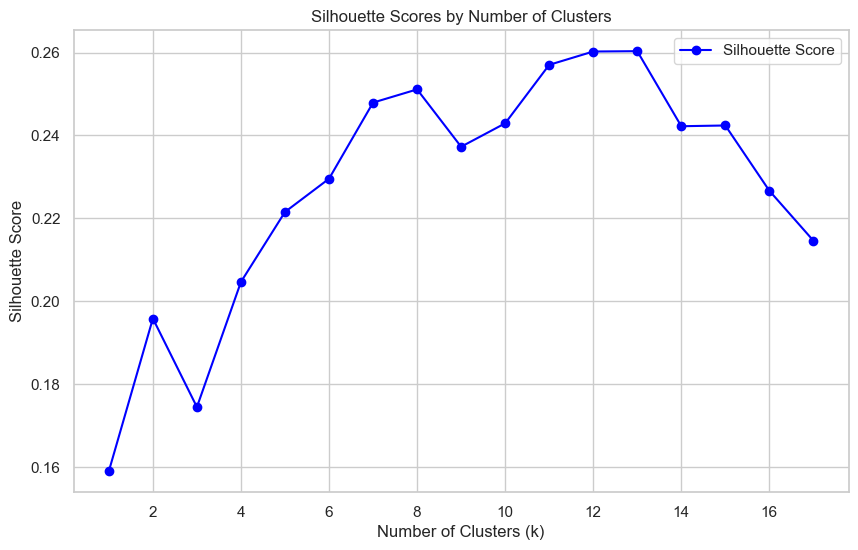

Silhouette score for best kappa: 0.319


In [45]:
from summarization_methods.topic_extraction_clustering_and_summarization import calc_clusters_with_kmeans

text_col='content'

# calculate the optimun kappa with KMeans via Silhouette score and using OPENAI embeddings ADA-002
df_sum_3, kmeans_results = calc_clusters_with_kmeans(df=df_sum_3, text_col=text_col, max_token_length=1000, is_pca=(True, 16))

In [46]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_3 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [47]:
from summarization_methods.topic_extraction_clustering_and_summarization import summarize_comments_by_cluster

text_col = 'content'
language = 'English'
topic = df_topics.iloc[0].topic

# produce the summaries for grouped comments by label
summaries_3 =summarize_comments_by_cluster(df=df_sum_3, text_col=text_col, prompt_name=prompt_template_3, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_3 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

Summary for cluster label: 5
The comments highlight a few key points surrounding the presentation on market trends. There is a consensus on the importance of deciding on actionable steps to implement insights gained from the presentation. Participants discuss the utility of organizing key ideas into three main sections to improve clarity and focus. The methodology employed in the presentation was appreciated, with some attendees mentioning that it could influence future approaches. There is a suggestion to refine and iterate on the ideas presented for better alignment with market developments. Lastly, there are additional creative suggestions aimed at further expanding on the presentation's insights.
-------------------------------------------------------------------------------------
Summary for cluster label: 0
The comments are brief and in agreement with previous discussions, explicitly indicating general approval and positive consensus about the presentation. There are no new thema

In [48]:
from summarization_methods.topic_extraction_clustering_and_summarization import final_summary_of_clustered_comments

# produce the final summary for the 3rd technique
final_summary_3 = final_summary_of_clustered_comments(prompt=prompt_template_final_3, gpt_model='gpt-4o', topic=topic, summaries=summaries_3)

The final summary of the discussion on the presentation about market trends reveals several key insights and patterns. Firstly, there is a strong consensus on the need for actionable steps to apply the insights from the presentation, with an emphasis on organizing key ideas to enhance clarity. The methodology used in the presentation was well-received, suggesting it could guide future approaches. Participants highlighted the importance of refining ideas to align better with market developments and offered creative suggestions for expanding insights further.

Throughout the feedback, a general trend of agreement and affirmation is evident, with participants often reflecting consensus with the presentation content without introducing new substantial themes. Comments frequently focus on procedural aspects or brief acknowledgments, such as operational queries and affirmations, rather than providing detailed thematic insights or critiques.

In instances where thematic engagement occurred, i

### 4TH SUMMARIZATION TECHNIQUE: TOPICS EXTRACTION OF COMMENTS, CLUSTER TOPICS AND SUMMARY THE CLUSTERS

We are going to implement our final technique in which we hope to be the best. Initially, we are going to extract topics for each comment/review. Moreover, we are going to cluster them with our best performing clustering technique, and for each cluster we are going to make a summary. Finally, based on these summaries we are going to create a final summary. 

In [49]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_topics = load_chosen_prompt(prompt_name='prompt_for_topic_extraction')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['topic', 'language', 'topics', 'comment']


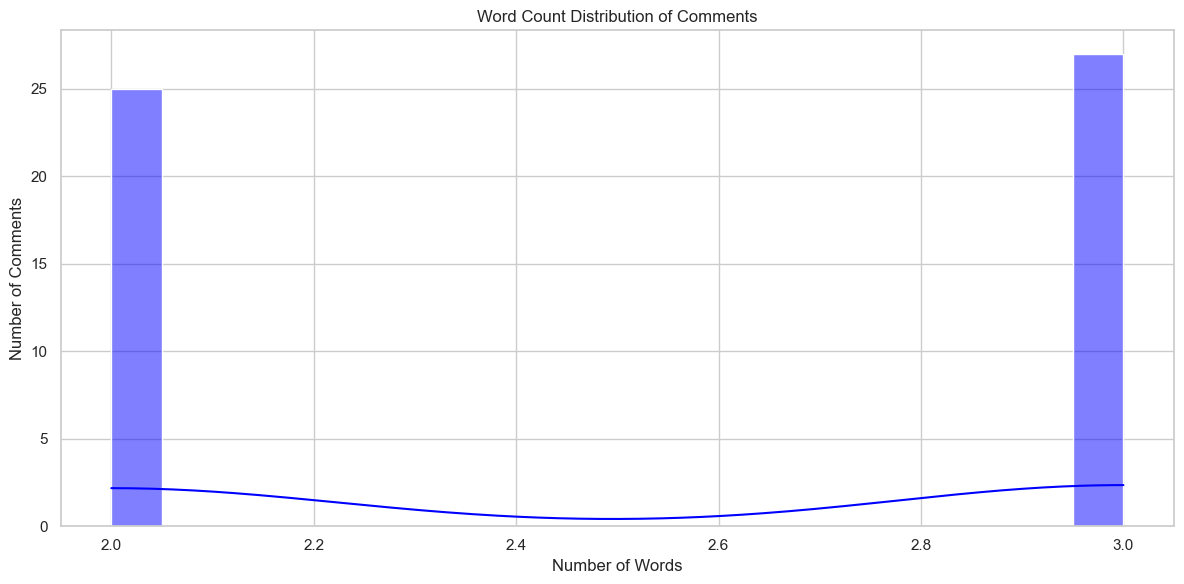

In [51]:
text_col='topics'

# plot the distribution of words
plot_distribution_of_words(df_topics_3, text_col)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52/52 [00:23<00:00,  2.17it/s]


Using PCA to transformed embeddings


 18%|██████████████████████▍                                                                                                   | 9/49 [00:00<00:01, 35.40it/s]


The product of size_min and n_clusters cannot exceed the number of samples.
Terminating the calculation...
The optimum kappa based on Penalized Silhouette score is: 8


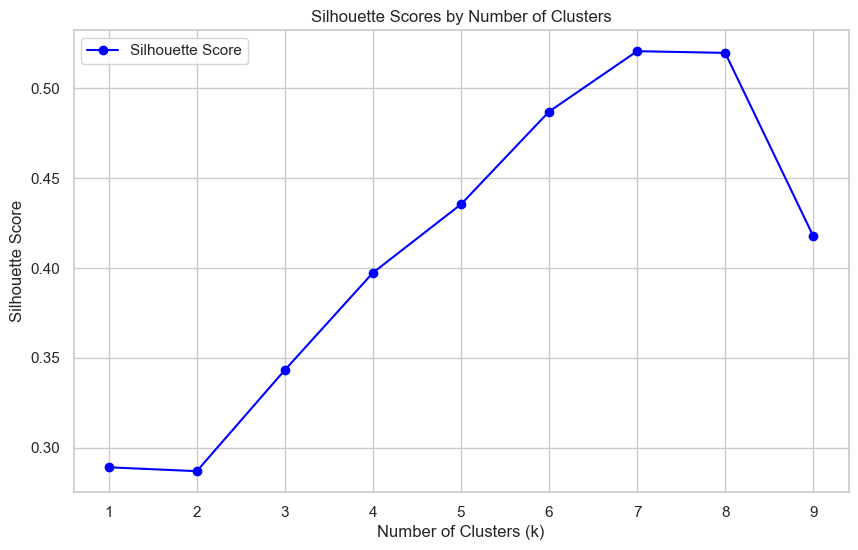

Silhouette score for best kappa: 0.567


In [52]:
from summarization_methods.topic_extraction_clustering_and_summarization import calc_clusters_with_kmeans

# calculate the optimun kappa with KMeans via Silhouette score and using OPENAI embeddings ADA-002
df_topics_3, kmeans_results_2 = calc_clusters_with_kmeans(df=df_topics_3, text_col=text_col, max_token_length=4000, is_pca=(True, 16))

In [53]:
# rename the columns and merge the proper
df_sum_3 = df_sum_3.reset_index().rename(columns={'index': 'comment_id'})
df_topics_3 = df_topics_3.rename(columns={'comment': 'comment_id'})

df_topics_3 = df_topics_3.merge(df_sum_3[['content', 'comment_id']], how='inner', on='comment_id')

grouped_comments_3 = df_topics_3.groupby('labels').agg(
    comments=('content', lambda x: list(x)),
    topics=('topics', lambda x: set(x)),
    comments_count=('comment_id', lambda x: len(list(x)))
    )

grouped_comments_3 = grouped_comments_3.reset_index()

In [54]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_4 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [55]:
from summarization_methods.topic_extraction_clustering_and_summarization import summarize_comments_by_cluster

text_col='comments'
language = 'English'
topic = df_topics.iloc[0].topic

# produce the summaries for grouped comments by label
summaries_4 =summarize_comments_by_cluster(df=grouped_comments_3, text_col=text_col, prompt_name=prompt_template_4, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_4 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

Summary for cluster label: 0
The comments on the presentation about market trends cover various important insights and topics. Firstly, there is a need to address unexpected market variables that can impact predictions, suggesting the importance of flexibility in strategy. Participants emphasize understanding consumer behavior shifts, as these are pivotal in anticipating market changes. The comments also highlight the necessity for data-driven approaches, underlining the value of using comprehensive analytics to enhance market forecasts. Furthermore, there is a call for more sector-specific examples to better illustrate trends and make them relatable. Overall, the group underlines the importance of adaptability, deep consumer insights, and robust data analysis in effectively navigating market trends.
-------------------------------------------------------------------------------------
Summary for cluster label: 1
The comments on the presentation about market trends highlight several ke

In [56]:
from summarization_methods.topic_extraction_clustering_and_summarization import final_summary_of_clustered_comments

# produce the final summary for the 4th technique
final_summary_4 = final_summary_of_clustered_comments(prompt=prompt_template_final_4, gpt_model='gpt-4o', topic=topic, summaries=summaries_4)

The final summary based on the derived summaries highlights several key insights regarding presentations on market trends. There is a consensus on the need for flexibility in addressing unexpected market variables and a strong focus on understanding consumer behavior shifts to make accurate predictions. The importance of data-driven approaches is underscored, emphasizing the use of both quantitative and qualitative data, as well as advancements in technology like AI, to refine predictive models.

Participants stress the necessity of contextualizing market data and aligning strategies with societal and economic trends to enhance engagement and efficacy. Presentations should ensure clear, structured communication, avoiding technical jargon, and include visual aids like charts to improve comprehension. Interactive elements and real-life examples are crucial for engaging the audience and facilitating deeper insights.

Global influences and real-time data should be considered, and storytell

### STORE THE FINAL SUMMARIES IN A CSV

In [57]:
# find the original summary
df_specific_summaries_list = pd.DataFrame(data['specific_query_list'])
print(df_specific_summaries_list.columns)
print('-----------------------------------------------------------------------------------')
print(df_specific_summaries_list)

Index(['query', 'answer', 'relevant_text_span'], dtype='object')
-----------------------------------------------------------------------------------
                                               query  \
0       Summarize the presentation on market trends.   
1  What did Marketing think of technology innovat...   
2  Why did Marketing propose lemon or lime when p...   
3  Summarize the decision discussion about remote...   
4  Why did the group decide not to go for an LCD ...   

                                              answer relevant_text_span  
0  Marketing presented on market trends and sugge...          [[0, 91]]  
1  Marketing mentioned that market research empha...         [[58, 71]]  
2  Because Marketing recommended the group took s...         [[77, 87]]  
3  The group discussed the final remote concepts ...       [[316, 639]]  
4  When discussing the LCD functionality, the gro...       [[395, 431]]  


In [58]:
final_summaries = {
    'original_summary': df_specific_summaries_list.loc[0, 'answer'], 
    'time_based_grouping_summarization': final_summary_1,
    'label_based_summarization': final_summary_2,
    'cluster_based_summarization': final_summary_3,
    'topic_extraction_cluster_based_summarization': final_summary_4
}

# Convert dictionary to DataFrame, with the keys as 'technique' and values as 'summary'
final_summaries_df = pd.DataFrame.from_dict(final_summaries, orient='index', columns=['summary']).reset_index()
final_summaries_df.rename(columns={'index': 'technique'}, inplace=True)

final_summaries_df.to_csv('outputs/final_summaries_1.csv', index=False)

In [59]:
final_summaries_df

,technique,summary
0,original_summary,Marketing presented on market trends and sugge...
1,time_based_grouping_summarization,The summary of the discussion on market trends...
2,label_based_summarization,The final summary of the discussion on the pre...
3,cluster_based_summarization,The final summary of the discussion on the pre...
4,topic_extraction_cluster_based_summarization,The final summary based on the derived summari...


In [60]:
import pandas as pd

final_summaries_df = pd.read_csv('outputs/final_summaries_1.csv')

In [61]:
final_summaries_df

,technique,summary
0,original_summary,Marketing presented on market trends and sugge...
1,time_based_grouping_summarization,The summary of the discussion on market trends...
2,label_based_summarization,The final summary of the discussion on the pre...
3,cluster_based_summarization,The final summary of the discussion on the pre...
4,topic_extraction_cluster_based_summarization,The final summary based on the derived summari...


### BENCMARKING BASED ON THE EXTRACTED SUMMARIES OF THE THREE (3) TECHNIQUES

The evaluation will become by using these metrics: ROUGE score, BLEU score and BERTScore

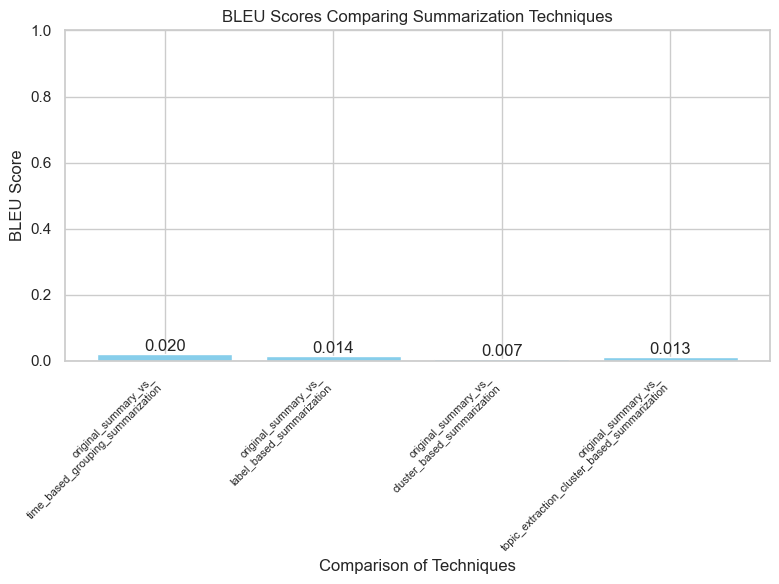

In [62]:
from utils.benchmark_summaries import calc_and_plot_bleu_scores

bleu_scores = calc_and_plot_bleu_scores(summaries_df=final_summaries_df,
                                        text_col='summary', title_col='technique')

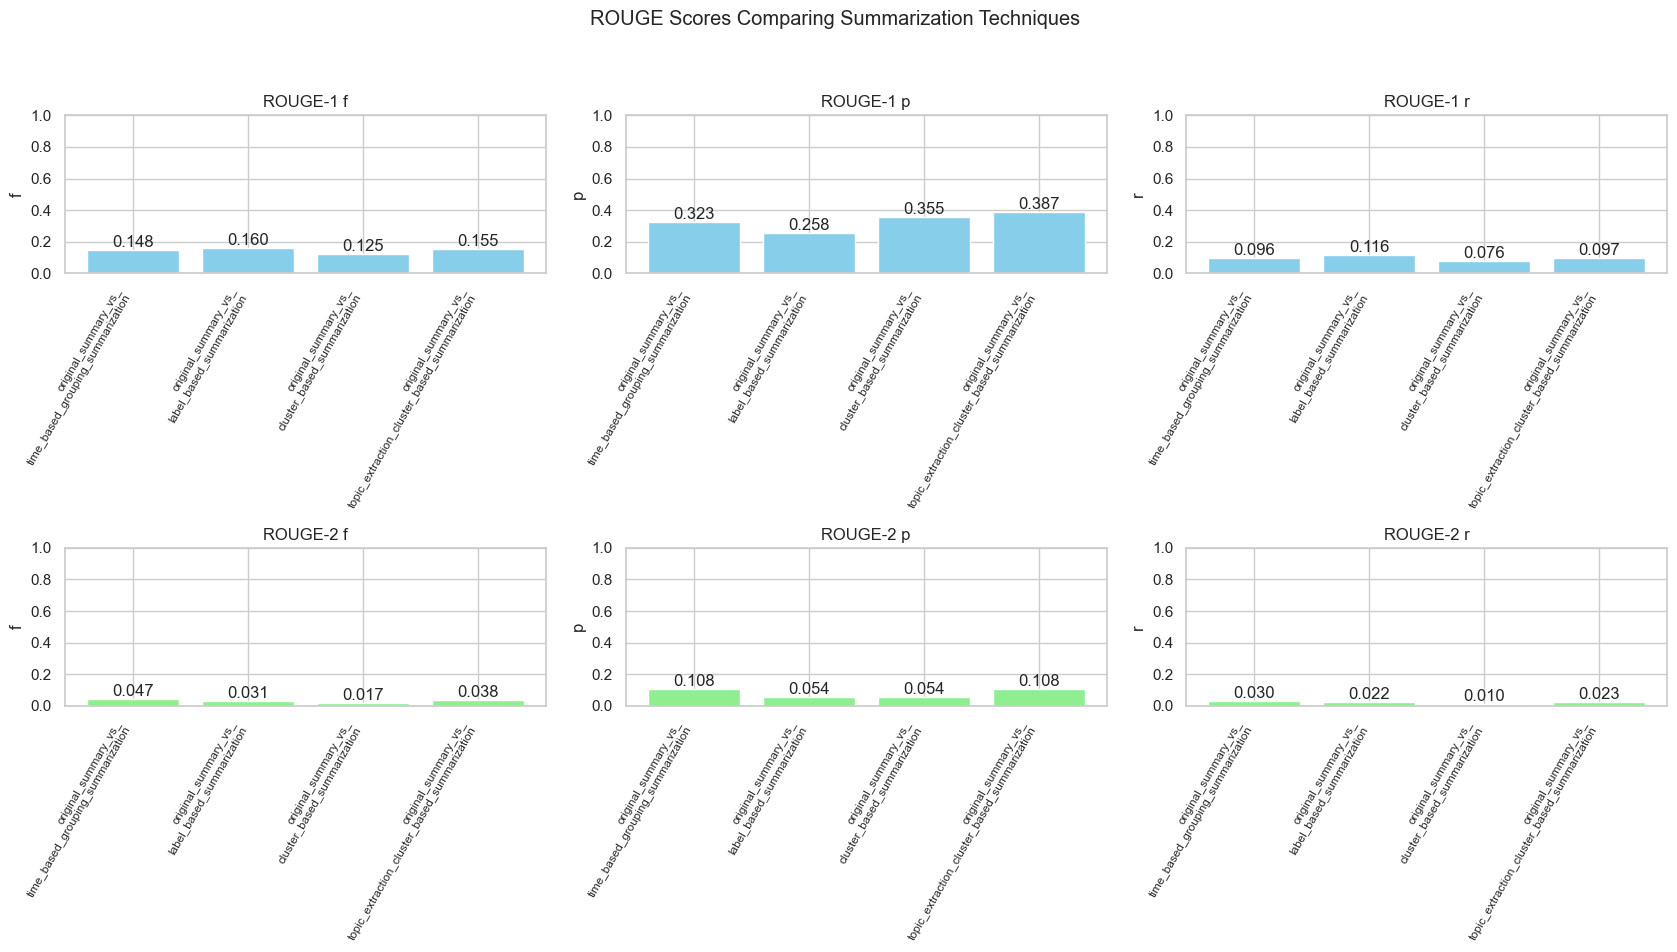

In [63]:
from utils.benchmark_summaries import calc_and_plot_rouge_scores

rouge_scores = calc_and_plot_rouge_scores(summaries_df=final_summaries_df,
                                        text_col='summary', title_col='technique')

C:\1. Python\LLM_mods_Topic_Modelling\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


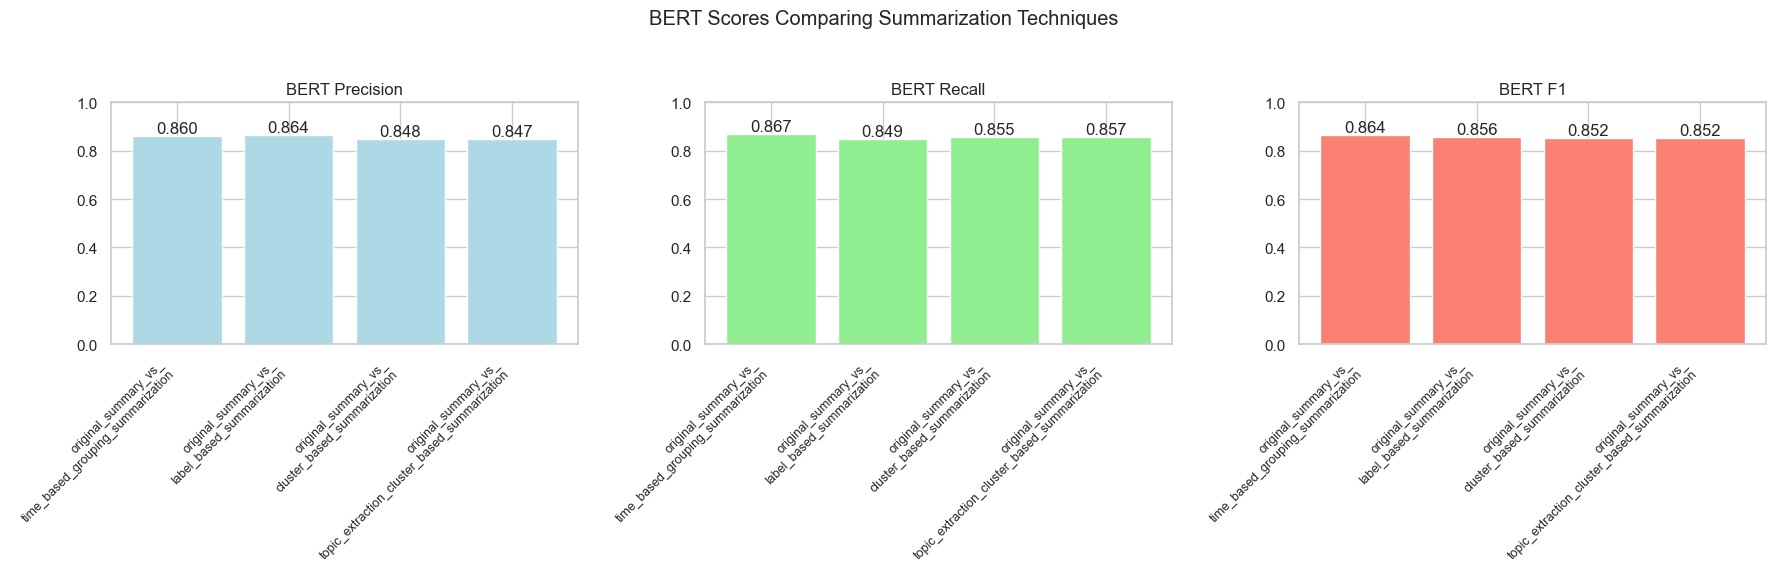

In [64]:
from utils.benchmark_summaries import calc_and_plot_bert_scores

bert_scores = calc_and_plot_bert_scores(summaries_df=final_summaries_df,
                                        text_col='summary',
                                        title_col='technique',
                                        model_to_use='princeton-nlp/sup-simcse-roberta-large',
                                        text_lang='en')